## CNN Feature Map Visualization

This module finalizes the CNN analysis pipeline by extracting and visualizing feature maps 
from convolutional layers of a trained model. It builds on prior steps:
   - Data Acquisition
   - Data Classification
   - Model Study/Tuning

Once the model has been defined and trained, this script generates visual representations 
of internal activations, enabling interpretability and deeper analysis. It also provides 
utility functions for formatting outputs (e.g., transparency handling, grid arrangement), 
which are useful for presenting model behavior in a clear and compact manner.

In [1]:
# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import project-specific constants
from activity_constants import *

# Import custom data preparation functions
from ipynb.fs.full.data_training import *

# Standard library and utility imports
import gc  # Garbage collector interface
import os  # File and directory operations
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Statistical data visualization

# Plotting and image libraries
import matplotlib.pyplot as plt  # Plotting framework
import matplotlib.image as mpimg  # For loading images

# TensorFlow and preprocessing
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img  # Image I/O and conversion
from sklearn import preprocessing  # Data scaling and normalization

# Keras core modules
from tensorflow import keras
from tensorflow.keras import backend as K  # Low-level backend functions
from tensorflow.keras import layers  # Layers API
from tensorflow.keras import Model  # Model class
from tensorflow.keras.optimizers import RMSprop  # Optimizer

# Utilities for evaluation and color mapping
from datetime import datetime  # Time utilities
from sklearn.metrics import confusion_matrix  # Performance metrics
from matplotlib.colors import ListedColormap  # Custom color maps
from PIL import Image  # Image file handling

2025-06-05 16:07:32.728251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-05 16:07:32.855665: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-05 16:07:33.334173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/oracle/11.2/client64/lib
2025-06-05 16:07:33.334230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so

In [2]:
# Set the name of the study to process
study_name = 'study_dense'

# Define folder to store global analysis results
global_overview_folder = model_folder + '/' + study_name

# Get the current working directory as base path
base_path = os.getcwd()

# Define subfolder name where images will be analyzed
image_analysis_folder = 'image_study'

# Prefix for naming layers of extracted image features
image_layer_prefix = 'img_ly'

# Select sample file to get feature maps files
input_file_path = 'sample.csv'

In [3]:
assay_codes = [1806]
data_model_folder = model_folder
dataset_folder = data_set_folder
model_path = global_overview_folder + '/model_1806#16_7#32_7##128_0#128_0.h5'

print_trace("Loading model for: " + model_path)

model = keras.models.load_model(model_path, custom_objects={'precision': precision, 'recall' : recall, 'f1': f1})


[ 06/05/2025, 16:07:34 ]: Loading model for: Model/study_dense/model_1806#16_7#32_7##128_0#128_0.h5


2025-06-05 16:07:34.235013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-05 16:07:34.264056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-05 16:07:34.264251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-05 16:07:34.264768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
########################################################################
# get_data_from_single_file: Loads and processes data from a single CSV 
# file, normalizes the data, and inserts the selected windowed portion 
# into the provided dataset list X.
#
# Inputs:
#   - input_file_path: Path to the CSV input file.
#   - X: List to which the processed data window will be appended.
#   - fromX: Starting column index for data selection.
#   - fromY: Starting row index for data selection.
#   - numCols: Number of columns to select.
#   - numRows: Number of rows to select.
#   - prefix: Optional parameter (unused in the current implementation).
#
# Returns:
#   - None (the processed data is appended directly to X).
########################################################################
def get_data_from_single_file(input_file_path, X, fromX, fromY, numCols, numRows, prefix = None):
    map_rows = [i+fromY for i in range (numRows)]
    map_columns = [i+fromX for i in range (numCols)]


    # Reading data from the file
    df = pd.read_csv(input_file_path,skiprows = 2)
    
    # Normalizing data for this sample
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_scaled = min_max_scaler.fit_transform(df.values)
    x_scaled = np.expand_dims(x_scaled, axis=2)

    # If data exists in the selected window range, insert it into the matrix X
    if (x_scaled.shape[1] >= fromX+numCols and x_scaled.shape[0] >= fromY+numRows):
        x_scaled_cut = x_scaled[np.ix_(map_rows, map_columns)]
        
        X += [x_scaled_cut]

In [5]:
# Getting the input arrays from sample file
dataRegionEspNumColumns = 1350
dataRegionEspNumRows = 295
dataRegionEspFromX = 0
dataRegionEspFromY = 0
assay_codes =[1806]


fromX = dataRegionEspFromX
fromY = dataRegionEspFromY
numCols = dataRegionEspNumColumns
numRows = dataRegionEspNumRows
prefix = None
X = []
y = []

get_data_from_single_file(input_file_path, X, fromX, fromY, numCols, numRows, prefix)
    
input_image = np.array(X)
print(model.predict(input_image))


1/1 [==============================] - 1s 967ms/step
[[0.29703456]]


2025-06-05 16:07:37.847036: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2025-06-05 16:07:37.976992: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [6]:
########################################################################
# convert_white_to_transparent: Converts white pixels in an image to 
# transparent and saves the output image as a TIFF file.
#
# Inputs:
#   - image_path: Path to the input image file.
#   - output_path: Path to save the processed image.
#
# Returns:
#   - None (The processed image is saved directly to output_path).
########################################################################
def convert_white_to_transparent(image_path, output_path):
    # Open the image
    img = Image.open(image_path).convert("RGBA")
    
    # Get image data
    datas = img.getdata()
    
    # Create a new list to store modified image data
    new_data = []
    
    # Iterate through image data
    for item in datas:
        # Change all white pixels (and shades of white) to transparent
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            # Set alpha to 0 (transparent)
            new_data.append((255, 255, 255, 0))
        else:
            new_data.append(item)
    
    # Update image data
    img.putdata(new_data)
    
    # Save the image
    img.save(output_path, "TIFF")

In [7]:
########################################################################
# print_feature_map_old: Extracts and visualizes feature maps from a specified
# convolutional layer of a model. It saves images with transparency adjustments.
#
# Inputs:
#   - model: Trained neural network model.
#   - dest_folder_path: Destination path for saving images.
#   - layer_order: Index of convolutional layer to visualize.
#   - fig_width: Width of figure for visualization.
#
# Returns:
#   - None (images saved directly).
########################################################################
def print_feature_map_old(model, dest_folder_path, layer_order=0, fig_width=80):

    dest_folder_path = f'{base_path}/{image_analysis_folder}/{image_layer_prefix}{layer_order}'

    if not os.path.exists(f'{base_path}/{image_analysis_folder}'):
        os.makedirs(f'{base_path}/{image_analysis_folder}')

    if not os.path.exists(dest_folder_path):
        os.makedirs(dest_folder_path)

    # Create an intermediate model that outputs convolutional layers
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
    intermediate_model = Model(inputs=model.input, outputs=layer_outputs)

    # Retrieve feature maps from the selected convolutional layer
    feature_maps = intermediate_model.predict(input_image)
    second_conv_layer_feature_maps = feature_maps[layer_order]

    # Visualize feature maps
    num_feature_maps = second_conv_layer_feature_maps.shape[-1]

    for i in range(num_feature_maps):
        fig, ax = plt.subplots(figsize=(11, 5))

        # Create a custom colormap with transparency for the lowest value
        cmap = plt.cm.viridis
        cmap_colors = cmap(np.arange(cmap.N))
        cmap_colors[0, -1] = 0  # Make the lowest value transparent
        transparent_cmap = ListedColormap(cmap_colors)

        ax.imshow(second_conv_layer_feature_maps[0, :, :, i], cmap=transparent_cmap)
        ax.axis('off')

        dest_path_file = f'{dest_folder_path}/sample_ly{layer_order}_feature_map_{i:02}.tiff'
        print(dest_path_file)
        plt.savefig(dest_path_file, format='tiff', dpi=300, bbox_inches='tight', pad_inches=0)
        plt.show()

        convert_white_to_transparent(dest_path_file, dest_path_file)


########################################################################
# print_feature_map: Extracts and visualizes feature maps from a specified
# convolutional layer of a model. Applies a white background to the lowest
# values for clearer visualization. Saves processed images.
#
# Inputs:
#   - model: Trained neural network model.
#   - dest_folder_path: Destination path for saving images.
#   - layer_order: Index of convolutional layer to visualize.
#   - fig_width: Width of figure for visualization.
#
# Returns:
#   - None (images saved directly).
########################################################################
def print_feature_map(model, dest_folder_path, layer_order=0, fig_width=80):
    dest_folder_path = f'{base_path}/{image_analysis_folder}/{image_layer_prefix}{layer_order}'

    if not os.path.exists(f'{base_path}/{image_analysis_folder}'):
        os.makedirs(f'{base_path}/{image_analysis_folder}')

    if not os.path.exists(dest_folder_path):
        os.makedirs(dest_folder_path)

    # Create an intermediate model that outputs convolutional layers
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
    intermediate_model = Model(inputs=model.input, outputs=layer_outputs)

    # Retrieve feature maps from the selected convolutional layer
    feature_maps = intermediate_model.predict(input_image)
    second_conv_layer_feature_maps = feature_maps[layer_order]

    # Visualize feature maps
    num_feature_maps = second_conv_layer_feature_maps.shape[-1]

    for i in range(num_feature_maps):
        fig, ax = plt.subplots(figsize=(11, 5))

        # Create a custom colormap with white for the lowest value
        cmap = plt.cm.viridis
        cmap_colors = cmap(np.arange(cmap.N))
        cmap_colors[0, :-1] = 1  # Make the lowest value white
        white_cmap = ListedColormap(cmap_colors)

        ax.imshow(second_conv_layer_feature_maps[0, :, :, i], cmap=white_cmap)
        ax.axis('off')

        dest_path_file = f'{dest_folder_path}/sample_ly{layer_order}_feature_map_{i:02}.tiff'
        print(dest_path_file)
        plt.savefig(dest_path_file, format='tiff', dpi=300, bbox_inches='tight', pad_inches=0)
        plt.show()

        convert_white_to_transparent(dest_path_file, dest_path_file)


########################################################################
# print_feature_map_new: Extracts and visualizes feature maps with improved
# colormap normalization and transparency for minimum values. It dynamically
# defines base paths and folder names.
#
# Inputs:
#   - model: Trained neural network model.
#   - dest_folder_path: Destination path for saving images.
#   - layer_order: Index of convolutional layer to visualize.
#   - fig_width: Width of figure for visualization.
#
# Returns:
#   - None (images saved directly).
########################################################################
def print_feature_map_new(model, dest_folder_path, layer_order=0, fig_width=80):
    # Define paths
    base_path = 'ruta_base'  # Define your base path
    image_analysis_folder = 'analisis_imagenes'  # Define your analysis folder
    image_layer_prefix = 'capa_'  # Define your layer prefix

    dest_folder_path = f'{base_path}/{image_analysis_folder}/{image_layer_prefix}{layer_order}'

    if not os.path.exists(f'{base_path}/{image_analysis_folder}'):
        os.makedirs(f'{base_path}/{image_analysis_folder}')

    if not os.path.exists(dest_folder_path):
        os.makedirs(dest_folder_path)

    # Create an intermediate model that outputs convolutional layers
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
    intermediate_model = Model(inputs=model.input, outputs=layer_outputs)

    # Retrieve feature maps from the selected convolutional layer
    feature_maps = intermediate_model.predict(input_image)
    selected_feature_maps = feature_maps[layer_order]

    # Visualize feature maps
    num_feature_maps = selected_feature_maps.shape[-1]

    for i in range(num_feature_maps):
        fig, ax = plt.subplots(figsize=(11, 5))

        # Create a custom colormap with transparency for the lowest value
        cmap = plt.cm.viridis
        cmap_colors = cmap(np.arange(cmap.N))
        cmap_colors[0, -1] = 0  # Make the lowest value transparent
        transparent_cmap = ListedColormap(cmap_colors)

        ax.imshow(selected_feature_maps[0, :, :, i], cmap=transparent_cmap,
                  vmin=selected_feature_maps.min(), vmax=selected_feature_maps.max())
        ax.axis('off')

        print(f'Printing on {dest_folder_path}/sample_ly{layer_order}_feature_map_{i:02}.tiff')
        plt.savefig(f'{dest_folder_path}/sample_ly{layer_order}_feature_map_{i:02}.tiff',
                    format='tiff', dpi=300, bbox_inches='tight', pad_inches=0)
        plt.show()

In [8]:
########################################################################
# create_image_grid: Assembles individual .tiff images from a folder into a
# single grid image. Useful for visualization and comparison.
#
# Inputs:
#   - image_folder: Path to folder containing .tiff images.
#   - output_path: File path to save the resulting image.
#   - images_per_row: Number of images to place per row in the grid.
#   - dpi: Resolution of the output image.
#   - margin: Margin in pixels between images.
#
# Returns:
#   - None (the output image is saved to disk).
########################################################################
def create_image_grid(image_folder, output_path, images_per_row=4, dpi=300, margin=40):
    # Get the list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.tiff')]
    image_files.sort()  # Sort the files to maintain order

    # Load the images
    images = [Image.open(os.path.join(image_folder, img_file)).convert("RGBA") for img_file in image_files]

    # Get the size of one image
    img_width, img_height = images[0].size

    # Calculate the size of the grid with margin
    num_images = len(images)
    num_rows = (num_images + images_per_row - 1) // images_per_row  # Round up
    grid_width = img_width * images_per_row + margin * (images_per_row - 1)
    grid_height = img_height * num_rows + margin * (num_rows - 1)

    # Create a new image for the grid with transparency
    grid_img = Image.new('RGBA', (grid_width, grid_height), color=(255, 255, 255, 0))

    # Paste the images into the grid with margin
    for idx, img in enumerate(images):
        row = idx // images_per_row
        col = idx % images_per_row
        x = col * (img_width + margin)
        y = row * (img_height + margin)
        grid_img.paste(img, (x, y), img)

    # Save the grid image with 300 dpi
    grid_img.save(output_path, format='TIFF', dpi=(dpi, dpi))

1/1 [==============================] - 0s 42ms/step
/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_00.tiff


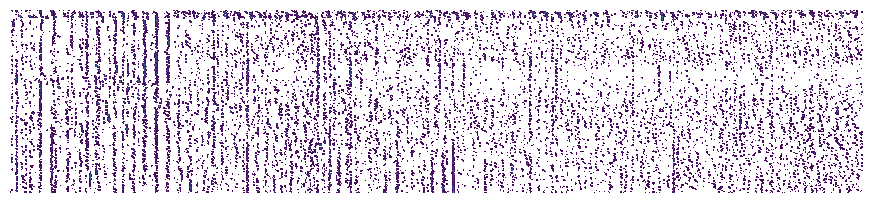

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_01.tiff


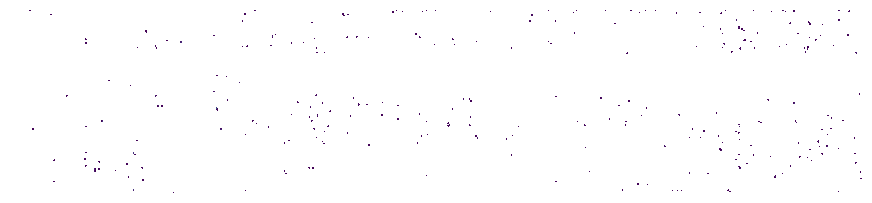

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_02.tiff


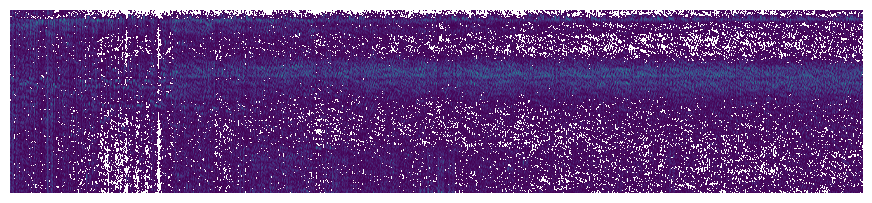

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_03.tiff


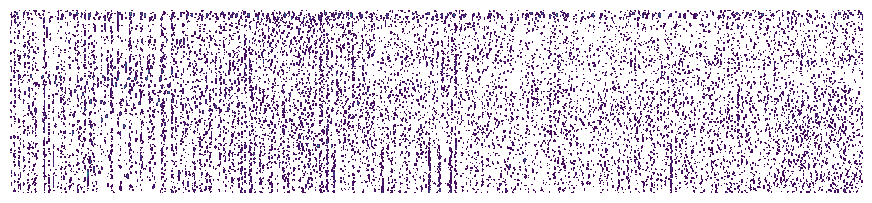

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_04.tiff


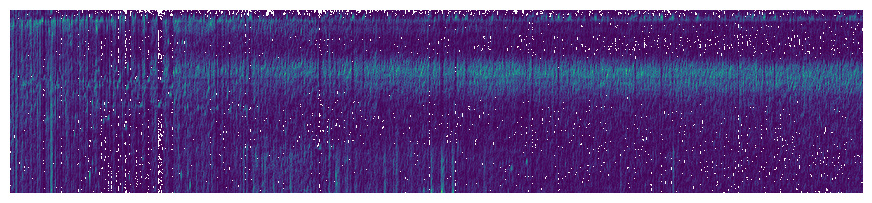

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_05.tiff


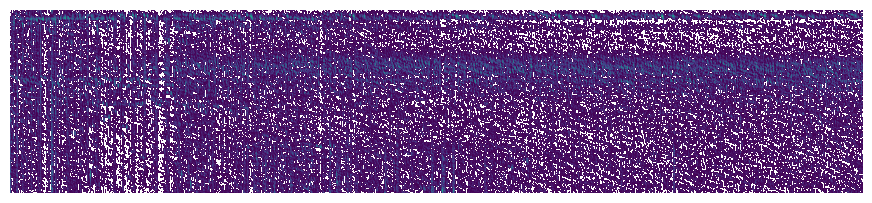

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_06.tiff


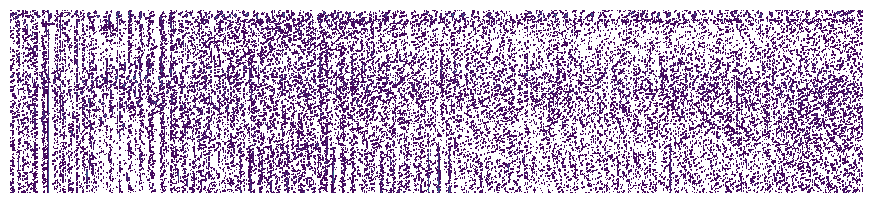

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_07.tiff


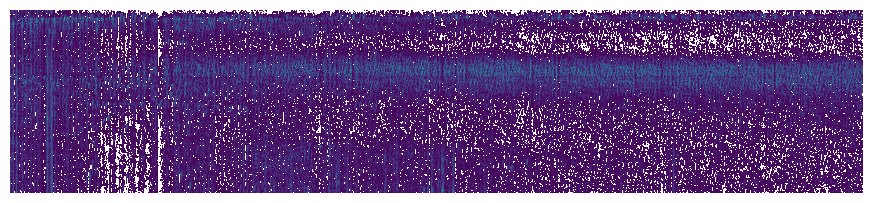

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_08.tiff


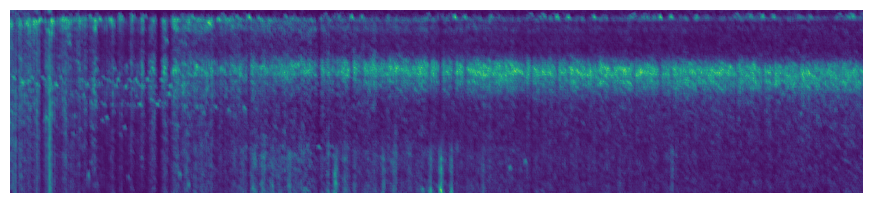

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_09.tiff


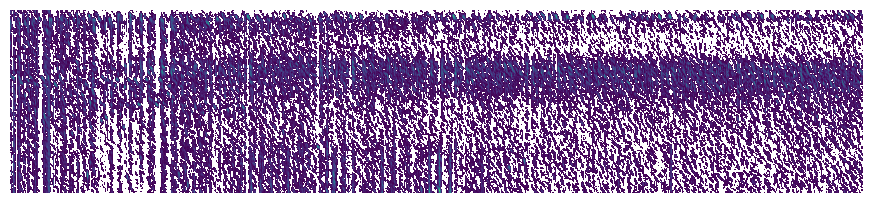

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_10.tiff


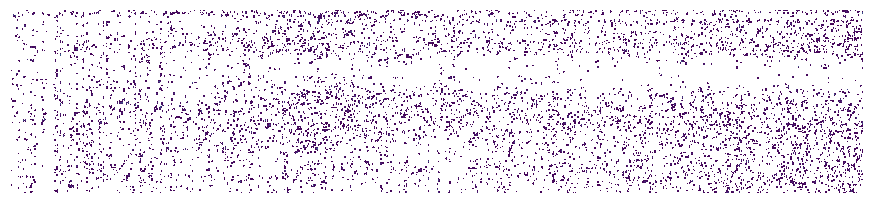

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_11.tiff


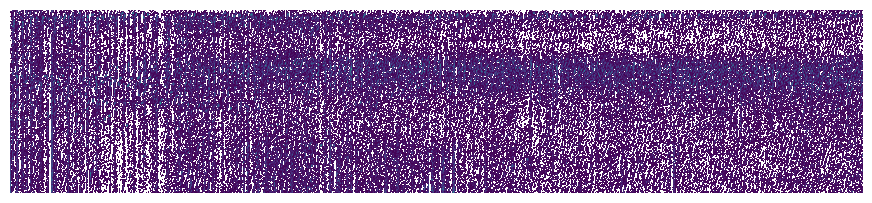

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_12.tiff


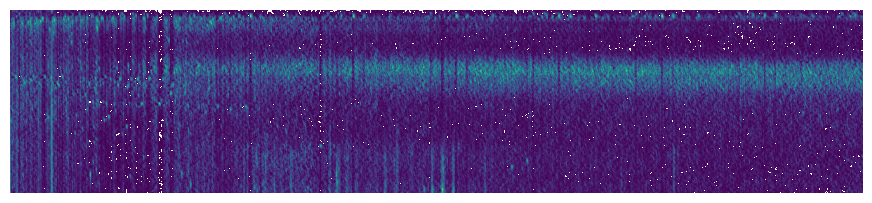

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_13.tiff


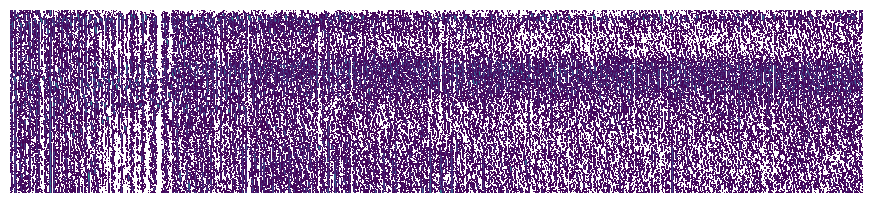

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_14.tiff


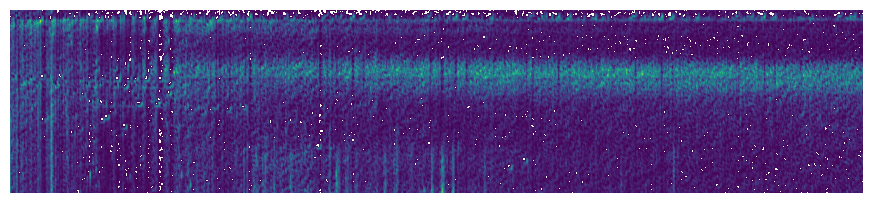

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly0/sample_ly0_feature_map_15.tiff


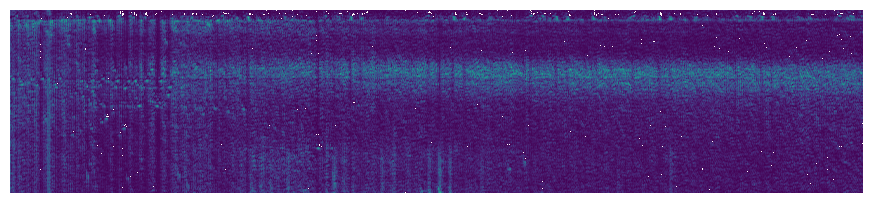

In [9]:
# Getting feature maps for the first layer
layer_order = 0
dest_folder_path = f'{base_path}/{image_analysis_folder}/{image_layer_prefix}{layer_order}'
print_feature_map (model, dest_folder_path, layer_order)

create_image_grid(dest_folder_path, f'image_grid_ly{layer_order}.tiff')

1/1 [==============================] - 0s 43ms/step
/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_00.tiff


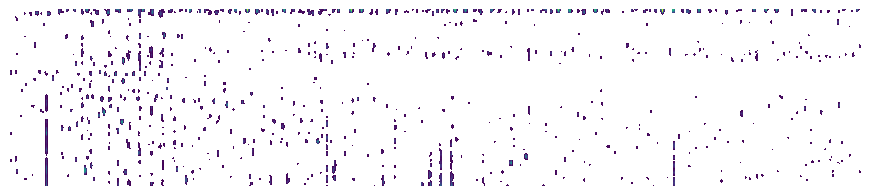

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_01.tiff


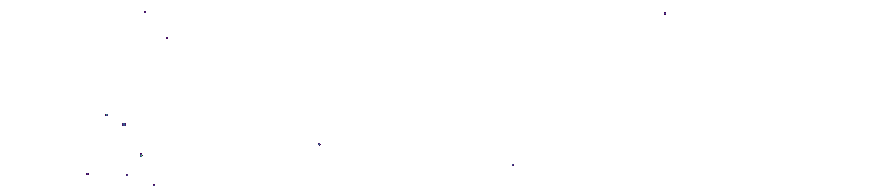

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_02.tiff


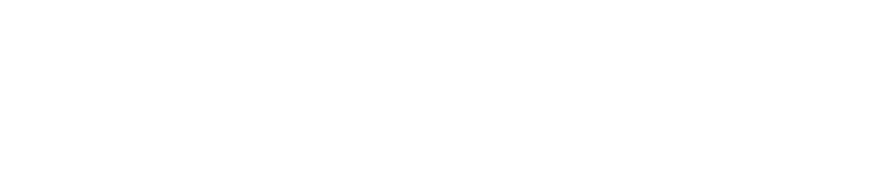

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_03.tiff


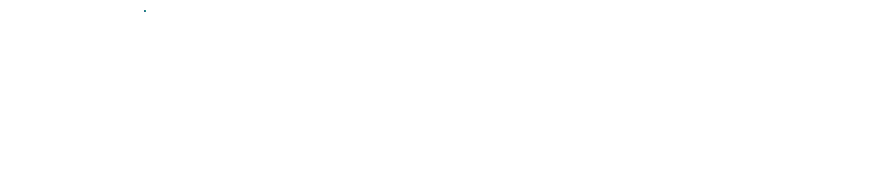

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_04.tiff


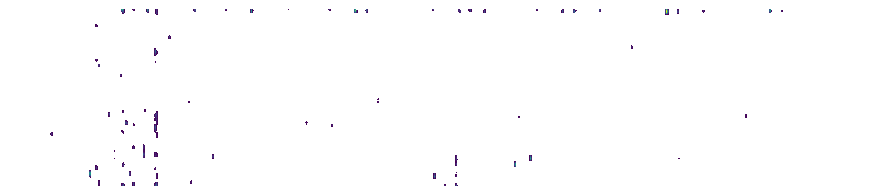

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_05.tiff


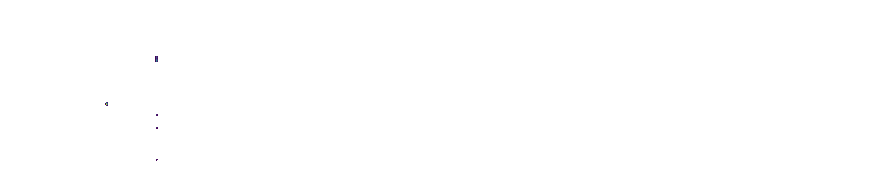

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_06.tiff


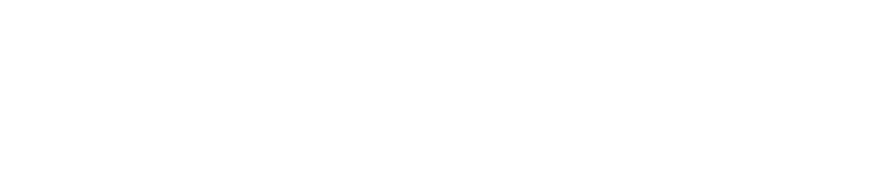

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_07.tiff


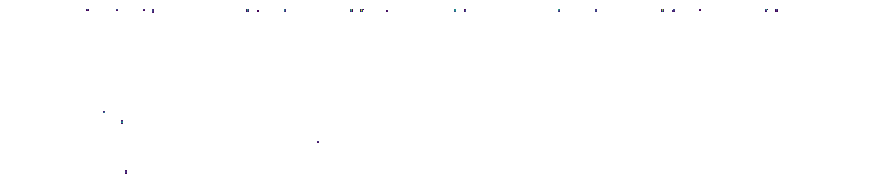

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_08.tiff


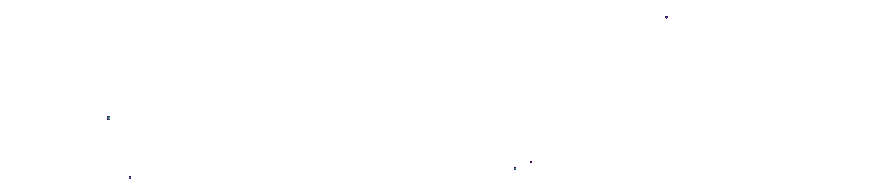

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_09.tiff


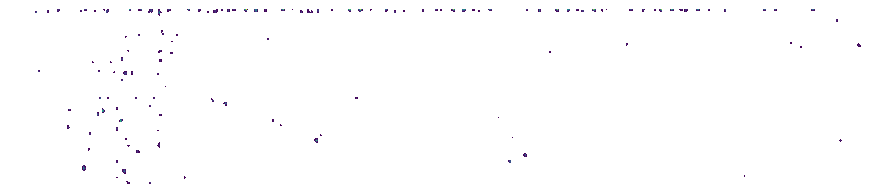

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_10.tiff


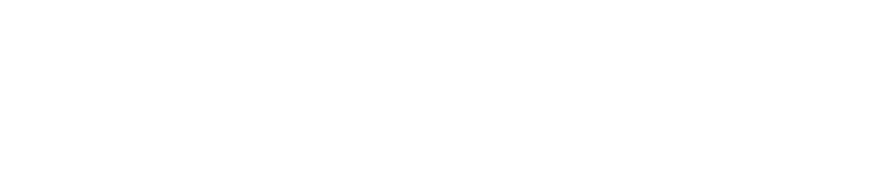

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_11.tiff


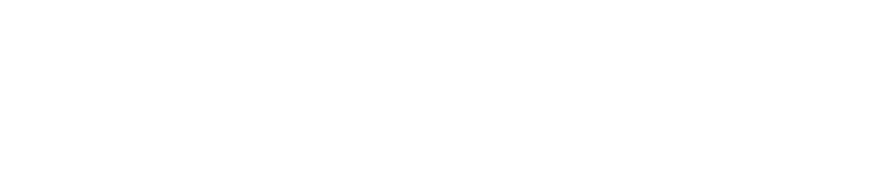

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_12.tiff


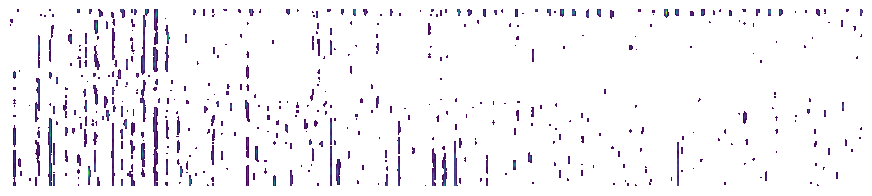

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_13.tiff


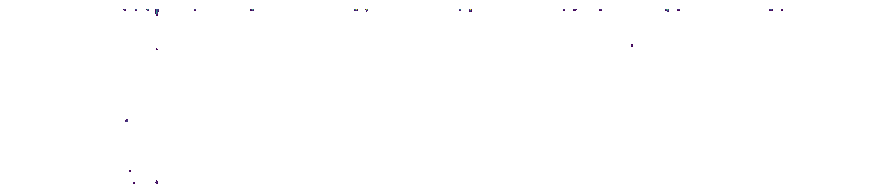

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_14.tiff


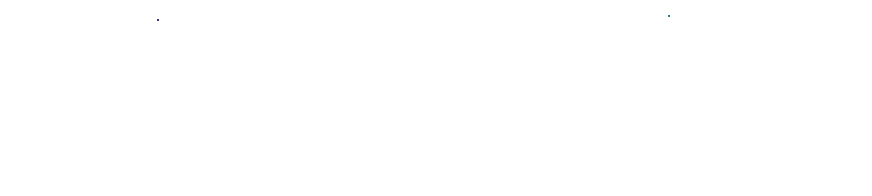

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_15.tiff


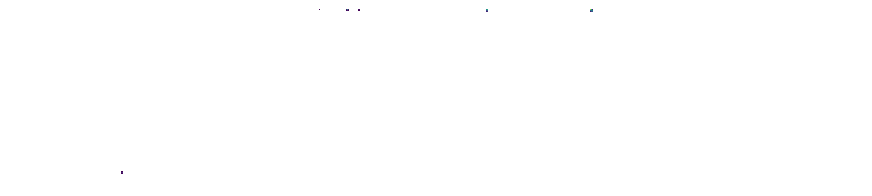

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_16.tiff


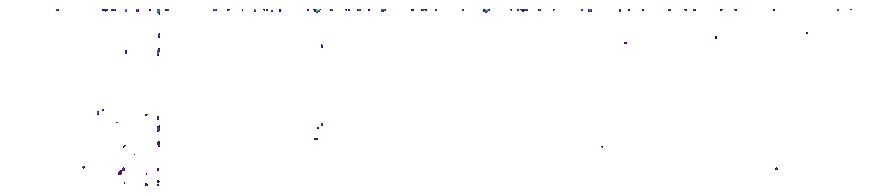

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_17.tiff


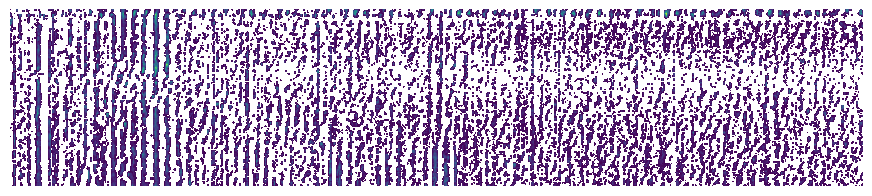

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_18.tiff


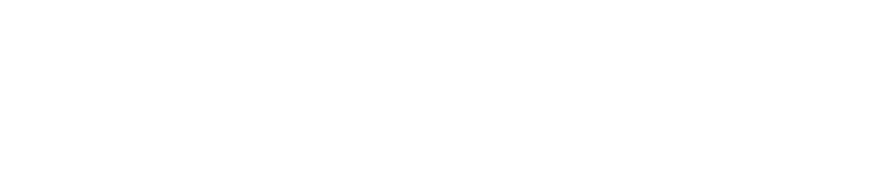

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_19.tiff


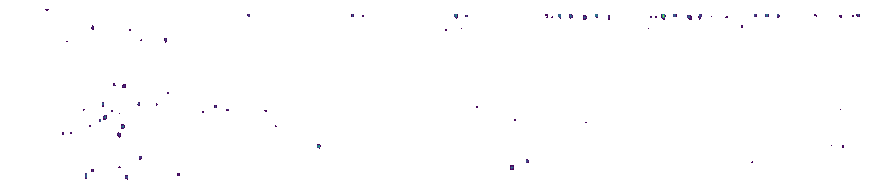

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_20.tiff


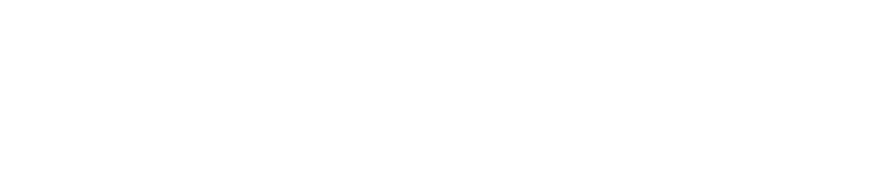

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_21.tiff


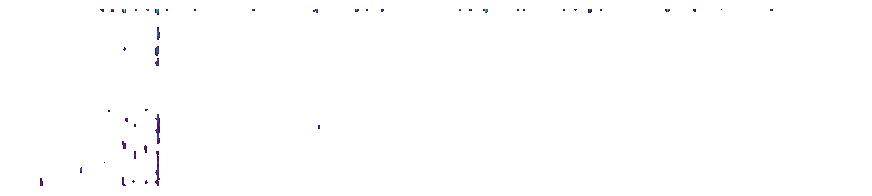

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_22.tiff


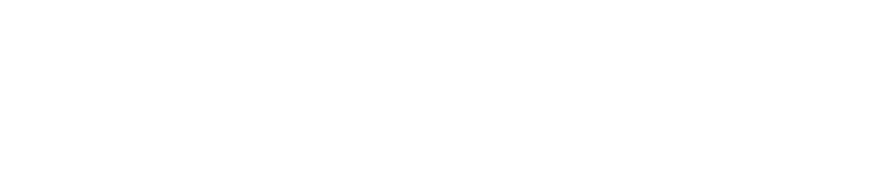

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_23.tiff


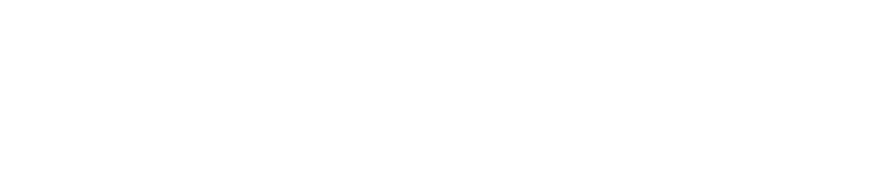

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_24.tiff


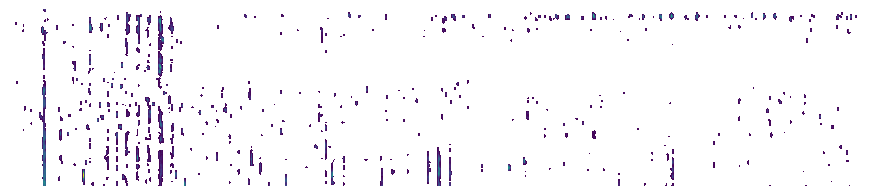

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_25.tiff


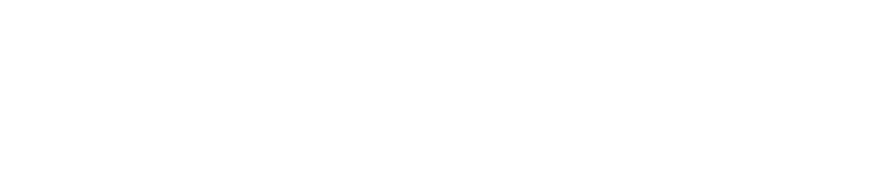

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_26.tiff


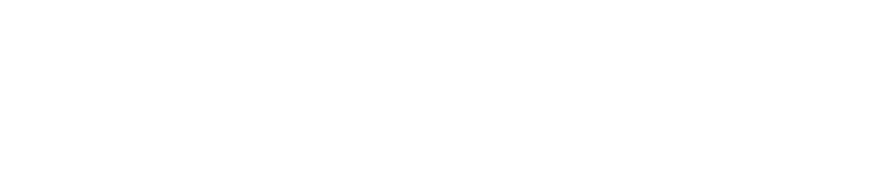

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_27.tiff


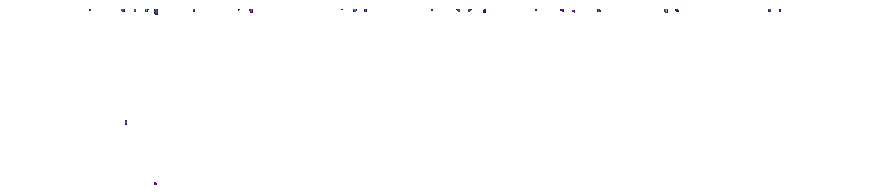

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_28.tiff


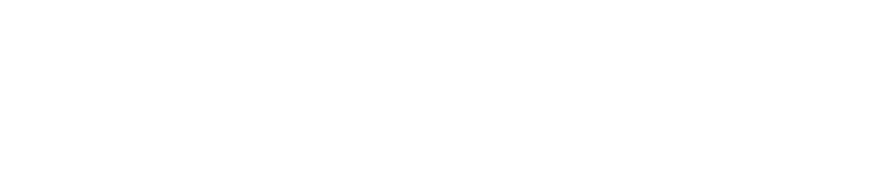

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_29.tiff


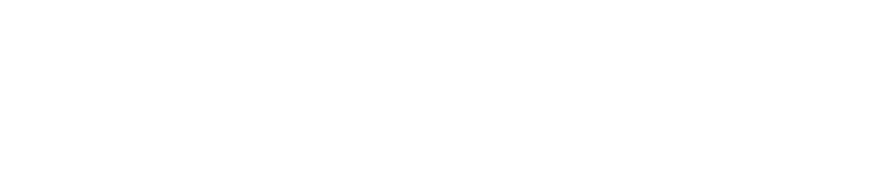

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_30.tiff


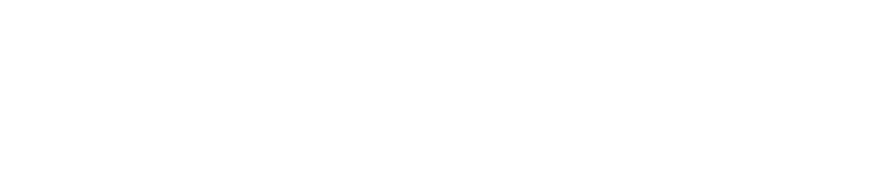

/home/manager/proyectos/Publication1_Entrega/image_study/img_ly1/sample_ly1_feature_map_31.tiff


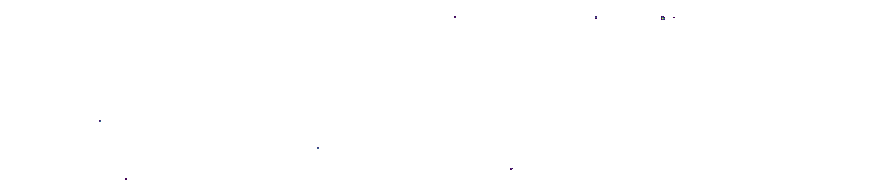

In [10]:
# Getting feature maps for the first layer
layer_order = 1
dest_folder_path = f'{base_path}/{image_analysis_folder}/{image_layer_prefix}{layer_order}'
print_feature_map (model, dest_folder_path, layer_order)

create_image_grid(dest_folder_path, f'image_grid_ly{layer_order}.tiff')